# Debdas Ghosh
## deg107@pitt.edu

In [1]:
import pandas as pd
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [2]:
diab_rh_df = pd.read_csv('diabetic_data.csv')

In [3]:
diab_rh_df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
diab_rh_df.shape

(101766, 50)

In [5]:
diab_rh_df['readmitted'].unique()

array(['NO', '>30', '<30'], dtype=object)

### Question #1: Use XGBoost, LightGBM, and CatBoost to predict 'readmitted' where readmitted == <30 or not (binary classification). We will assume that each row is a unique hospitalization. Which model performs best? Keep any hyperparameter tuning that you do to each model.

Hint: For CatBoost, categorical, independent variables are:

- race
- gender
- age
- weight
- admission_type_id
- discharge_disposition_id
- admission_source_id
- payer_code
- medical_specialty
- number_outpatient
- number_inpatient
- number emergency
- diag_1, diag_2, diag_3
- remaining columns after diag_3 that are 'object' datatypes

11 points:

- 4 points for train vs. test split
- 3 points for successful XGBoost, LightGBM, and CatBoost model (1 point per model)
- 4 points for identifying best model:
    - 1 point for using acceptable evaluation metric
    - 1 point for correctly identifying best model
    - 1 point for comparing all models on test data for same metric
    - 1 point for identifying models that may be overfit or underfit (if applicable)

In [6]:
diab_rh_df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [7]:
diab_rh_df[['max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
           'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
           'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
           'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone',
           'change', 'diabetesMed']].head()

,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes
2,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes
3,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes
4,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes


In [8]:
diab_rh_df['age'].unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

In [9]:
diab_rh_df['weight'].unique()

array(['?', '[75-100)', '[50-75)', '[0-25)', '[100-125)', '[25-50)',
       '[125-150)', '[175-200)', '[150-175)', '>200'], dtype=object)

In [10]:
diab_rh_df['payer_code'].unique()

array(['?', 'MC', 'MD', 'HM', 'UN', 'BC', 'SP', 'CP', 'SI', 'DM', 'CM',
       'CH', 'PO', 'WC', 'OT', 'OG', 'MP', 'FR'], dtype=object)

In [11]:
diab_rh_df['medical_specialty'].unique()

array(['Pediatrics-Endocrinology', '?', 'InternalMedicine',
       'Family/GeneralPractice', 'Cardiology', 'Surgery-General',
       'Orthopedics', 'Gastroenterology',
       'Surgery-Cardiovascular/Thoracic', 'Nephrology',
       'Orthopedics-Reconstructive', 'Psychiatry', 'Emergency/Trauma',
       'Pulmonology', 'Surgery-Neuro',
       'Obsterics&Gynecology-GynecologicOnco', 'ObstetricsandGynecology',
       'Pediatrics', 'Hematology/Oncology', 'Otolaryngology',
       'Surgery-Colon&Rectal', 'Pediatrics-CriticalCare', 'Endocrinology',
       'Urology', 'Psychiatry-Child/Adolescent', 'Pediatrics-Pulmonology',
       'Neurology', 'Anesthesiology-Pediatric', 'Radiology',
       'Pediatrics-Hematology-Oncology', 'Psychology', 'Podiatry',
       'Gynecology', 'Oncology', 'Pediatrics-Neurology',
       'Surgery-Plastic', 'Surgery-Thoracic',
       'Surgery-PlasticwithinHeadandNeck', 'Ophthalmology',
       'Surgery-Pediatric', 'Pediatrics-EmergencyMedicine',
       'PhysicalMedicineandRe

In [12]:
from sklearn import preprocessing
race_le = preprocessing.LabelEncoder()
race_le.fit(diab_rh_df['race'])
diab_rh_df['race_le'] = race_le.transform(diab_rh_df['race'])

age_le = preprocessing.LabelEncoder()
age_le.fit(diab_rh_df['age'])
diab_rh_df['age_le'] = age_le.transform(diab_rh_df['age'])

gender_le = preprocessing.LabelEncoder()
gender_le.fit(diab_rh_df['gender'])
diab_rh_df['gender_le'] = gender_le.transform(diab_rh_df['gender'])

weight_le = preprocessing.LabelEncoder()
weight_le.fit(diab_rh_df['weight'])
diab_rh_df['weight_le'] = weight_le.transform(diab_rh_df['weight'])

payer_le = preprocessing.LabelEncoder()
payer_le.fit(diab_rh_df['payer_code'])
diab_rh_df['payer_le'] = payer_le.transform(diab_rh_df['payer_code'])

med_spec_le = preprocessing.LabelEncoder()
med_spec_le.fit(diab_rh_df['medical_specialty'])
diab_rh_df['med_spec_le'] = med_spec_le.transform(diab_rh_df['medical_specialty'])

diag1_le = preprocessing.LabelEncoder()
diag1_le.fit(diab_rh_df['diag_1'])
diab_rh_df['diag1_le'] = diag1_le.transform(diab_rh_df['diag_1'])

diag2_le = preprocessing.LabelEncoder()
diag2_le.fit(diab_rh_df['diag_2'])
diab_rh_df['diag2_le'] = diag2_le.transform(diab_rh_df['diag_2'])

diag3_le = preprocessing.LabelEncoder()
diag3_le.fit(diab_rh_df['diag_3'])
diab_rh_df['diag3_le'] = diag3_le.transform(diab_rh_df['diag_3'])

In [13]:
diab_rh_onehot_df = pd.get_dummies(diab_rh_df, columns = ['max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
           'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
           'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
           'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone',
           'change', 'diabetesMed'])

In [14]:
diab_rh_onehot_df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,readmitted,race_le,age_le,gender_le,weight_le,payer_le,med_spec_le,diag1_le,diag2_le,diag3_le,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,metformin_Down,metformin_No,metformin_Steady,metformin_Up,repaglinide_Down,repaglinide_No,repaglinide_Steady,repaglinide_Up,nateglinide_Down,nateglinide_No,nateglinide_Steady,nateglinide_Up,chlorpropamide_Down,chlorpropamide_No,chlorpropamide_Steady,chlorpropamide_Up,glimepiride_Down,glimepiride_No,glimepiride_Steady,glimepiride_Up,acetohexamide_No,acetohexamide_Steady,glipizide_Down,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_Down,glyburide_No,glyburide_Steady,glyburide_Up,tolbutamide_No,tolbutamide_Steady,pioglitazone_Down,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_Down,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_Down,acarbose_No,acarbose_Steady,acarbose_Up,miglitol_Down,miglitol_No,miglitol_Steady,miglitol_Up,troglitazone_No,troglitazone_Steady,tolazamide_No,tolazamide_Steady,tolazamide_Up,examide_No,citoglipton_No,insulin_Down,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_Down,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_No,glipizide-metformin_Steady,glimepiride-pioglitazone_No,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_No,metformin-rosiglitazone_Steady,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,NO,3,0,0,1,0,38,124,650,670,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,1,0
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,>30,3,1,0,1,0,0,143,79,121,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,NO,1,2,0,1,0,0,454,78,767,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,NO,3,3,1,1,0,0,554,97,248,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,NO,3,4,1,1,0,0,54,24,86,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1


In [15]:
diab_rh_xvars = diab_rh_onehot_df[['encounter_id', 'patient_nbr', 'num_lab_procedures', 'time_in_hospital',
                                   'num_procedures','num_medications','number_outpatient','number_emergency',
                                   'number_inpatient', 'number_diagnoses', 'race_le','age_le','gender_le','weight_le','payer_le','med_spec_le','max_glu_serum_>200',
'max_glu_serum_>300','max_glu_serum_None','max_glu_serum_Norm','A1Cresult_>7','A1Cresult_>8',
'A1Cresult_None','A1Cresult_Norm','metformin_Down','metformin_No','metformin_Steady','metformin_Up',
'repaglinide_Down','repaglinide_No','repaglinide_Steady','repaglinide_Up','nateglinide_Down','nateglinide_No',
'nateglinide_Steady','nateglinide_Up','chlorpropamide_Down','chlorpropamide_No','chlorpropamide_Steady',
'chlorpropamide_Up','glimepiride_Down','glimepiride_No','glimepiride_Steady','glimepiride_Up','acetohexamide_No',
'acetohexamide_Steady','glipizide_Down','glipizide_No','glipizide_Steady','glipizide_Up','glyburide_Down',
'glyburide_No','glyburide_Steady','glyburide_Up','tolbutamide_No','tolbutamide_Steady','pioglitazone_Down',
'pioglitazone_No','pioglitazone_Steady','pioglitazone_Up','rosiglitazone_Down','rosiglitazone_No','rosiglitazone_Steady',
'rosiglitazone_Up','acarbose_Down','acarbose_No','acarbose_Steady','acarbose_Up','miglitol_Down','miglitol_No',
'miglitol_Steady','miglitol_Up','troglitazone_No','troglitazone_Steady','tolazamide_No','tolazamide_Steady','tolazamide_Up',
'examide_No','citoglipton_No','insulin_Down','insulin_No','insulin_Steady','insulin_Up','glyburide-metformin_Down',
'glyburide-metformin_No','glyburide-metformin_Steady','glyburide-metformin_Up','glipizide-metformin_No',
'glipizide-metformin_Steady','glimepiride-pioglitazone_No','glimepiride-pioglitazone_Steady','metformin-rosiglitazone_No',
'metformin-rosiglitazone_Steady','metformin-pioglitazone_No','metformin-pioglitazone_Steady','change_Ch','change_No',
'diabetesMed_No','diabetesMed_Yes'
                                  ]]

In [16]:
diab_rh_onehot_df['readmitted'].unique()

array(['NO', '>30', '<30'], dtype=object)

In [17]:
import numpy as np
diab_rh_onehot_df['target'] = np.where(diab_rh_onehot_df['readmitted'] == '<30', 1, 0)

In [18]:
target = diab_rh_onehot_df['target']

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(diab_rh_xvars.drop(columns = ['encounter_id', 'patient_nbr']), 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=1)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state=1)

### XGBoost

In [20]:
import xgboost as xgb
dtrain = xgb.DMatrix(data = x_train, label = y_train)
dval = xgb.DMatrix(data = x_val, label = y_val)
dtest = xgb.DMatrix(data = x_test, label = y_test)

In [21]:
# Set our parameters
param1 = {'max_depth':3,
         'eta': 0.35,
         'silent':1,
         'objective':'binary:logistic',
         'eval_metric': 'logloss'
         #,'gamma': ???,
         #,'lambda': ???,
         #,'alpha': ???,
         #,'min_child_weight': ???,
         #,'colsample_bytree' :??? 
         #,colsample_bynode' : ???
         #,'scale_pos_weight' : ???
         ,'maximize' : 'FALSE'
         ,'n_jobs' : -1
         #,'base_score' : ???
         #,'max_delta_step' : ???
        }

In [22]:
# specify validations set to watch performance
watchlist = [(dtrain, 'train'), (dval, 'eval')]
num_round = 25 #This is another hyperparameter of sorts
bst = xgb.train(param1, dtrain, num_round, watchlist, early_stopping_rounds = 10)

[0]	train-logloss:0.515486	eval-logloss:0.516951
Multiple eval metrics have been passed: 'eval-logloss' will be used for early stopping.

Will train until eval-logloss hasn't improved in 10 rounds.
[1]	train-logloss:0.431509	eval-logloss:0.434094
[2]	train-logloss:0.387424	eval-logloss:0.390843
[3]	train-logloss:0.363639	eval-logloss:0.36776
[4]	train-logloss:0.350848	eval-logloss:0.355631
[5]	train-logloss:0.344012	eval-logloss:0.349189
[6]	train-logloss:0.340426	eval-logloss:0.346061
[7]	train-logloss:0.338515	eval-logloss:0.344479
[8]	train-logloss:0.337378	eval-logloss:0.343909
[9]	train-logloss:0.336749	eval-logloss:0.343594
[10]	train-logloss:0.336205	eval-logloss:0.343414
[11]	train-logloss:0.33588	eval-logloss:0.343212
[12]	train-logloss:0.335557	eval-logloss:0.343137
[13]	train-logloss:0.335277	eval-logloss:0.343099
[14]	train-logloss:0.335045	eval-logloss:0.343037
[15]	train-logloss:0.334827	eval-logloss:0.342996
[16]	train-logloss:0.334698	eval-logloss:0.342983
[17]	train-lo

In [23]:
rh_train_w_preds = x_train.copy()
rh_train_w_preds['xgb_probs'] = bst.predict(dtrain)

rh_test_w_preds = x_test.copy()
rh_test_w_preds['xgb_probs'] = bst.predict(dtest)

In [30]:
from sklearn import metrics

In [24]:
y = y_test.copy()
scores_train = rh_train_w_preds['xgb_probs']
scores = rh_test_w_preds['xgb_probs']

In [25]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, scores_train)
metrics.auc(fpr, tpr)

0.6577497555973362

In [26]:
fpr, tpr, thresholds = metrics.roc_curve(y, scores)
metrics.auc(fpr, tpr)

0.639262825651416

#### Hyperparameters Tuning for XGBoost

In [34]:
import hyperopt as hp
import lightgbm as lgb
from hyperopt import Trials,fmin,STATUS_OK

In [28]:
# Sets the space to search over and the prior probabilities over the search space 
xgb_space = {
    'booster': hp.hp.choice('booster',  ['gbtree']),
    'eta': hp.hp.loguniform('learning_rate', -4, 0),
    'max_depth':hp.hp.choice('max_depth', np.arange(1, 100,1, dtype=int)),
    'lambda': hp.hp.uniform('reg_alpha', 0.0, 1000.0),
    'alpha': hp.hp.uniform('reg_lambda', 0.0, 1000.0),
    'gamma': hp.hp.uniform('reg_gamma', 0.0, 1000.0),
    'objective': hp.hp.choice('objective', ['binary:logistic']),
    'eval_metric' : hp.hp.choice('eval_metric', ['logloss']),
    'n_jobs': hp.hp.choice('n_thread', [-1]),
    'maximize' : hp.hp.choice('maximize', ['FALSE'])
    }

In [29]:
def objective_m(params, n_folds=5):


    model = xgb.cv(params = params,
              dtrain = dtrain,
              num_boost_round = 10,
              early_stopping_rounds = 10,
             nfold = n_folds)
  
    #print(model)
    loss = max(model['test-logloss-mean'])
    return loss


bayes_trials = Trials()
MAX_EVALS = 100 # this controls the runtime 

xgb_best_m = fmin(fn = objective_m, space = xgb_space, algo = hp.tpe.suggest, max_evals = MAX_EVALS, trials = bayes_trials)

100%|█████████████████████████████████████████████| 100/100 [07:02<00:00,  4.23s/trial, best loss: 0.37130019999999997]


In [30]:
xgb_best_m

{'booster': 0,
 'eval_metric': 0,
 'learning_rate': 0.9848624666524517,
 'max_depth': 95,
 'maximize': 0,
 'n_thread': 0,
 'objective': 0,
 'reg_alpha': 98.69241139970768,
 'reg_gamma': 226.17605897929968,
 'reg_lambda': 546.4221827233212}

In [31]:
# By HyperOpt -- Best Result
param2 = {'booster': 'gbtree',
 'eval_metric': 'logloss',
 'learning_rate': 0.9848624666524517,
 'max_depth': 95,
 'maximize': 'FALSE',
 'n_thread': 0,
 'objective': 'binary:logistic',
 'reg_alpha': 98.69241139970768,
 'reg_gamma': 226.17605897929968,
 'reg_lambda': 546.4221827233212}

In [32]:
# specify validations set to watch performance
watchlist = [(dtrain, 'train'), (dval, 'eval')]
num_round = 25 #This is another hyperparameter of sorts
bst2 = xgb.train(param2, dtrain, num_round, watchlist, early_stopping_rounds = 10)

[0]	train-logloss:0.368476	eval-logloss:0.372256
Multiple eval metrics have been passed: 'eval-logloss' will be used for early stopping.

Will train until eval-logloss hasn't improved in 10 rounds.
[1]	train-logloss:0.343937	eval-logloss:0.348948
[2]	train-logloss:0.339592	eval-logloss:0.345359
[3]	train-logloss:0.338162	eval-logloss:0.344598
[4]	train-logloss:0.337461	eval-logloss:0.344387
[5]	train-logloss:0.336589	eval-logloss:0.343973
[6]	train-logloss:0.33612	eval-logloss:0.343908
[7]	train-logloss:0.335756	eval-logloss:0.34396
[8]	train-logloss:0.335586	eval-logloss:0.343898
[9]	train-logloss:0.335162	eval-logloss:0.343621
[10]	train-logloss:0.335055	eval-logloss:0.343629
[11]	train-logloss:0.335055	eval-logloss:0.343629
[12]	train-logloss:0.335055	eval-logloss:0.343629
[13]	train-logloss:0.335055	eval-logloss:0.343629
[14]	train-logloss:0.335055	eval-logloss:0.343629
[15]	train-logloss:0.335055	eval-logloss:0.343629
[16]	train-logloss:0.335055	eval-logloss:0.343629
[17]	train-lo

In [33]:
rh_train_w_preds = x_train.copy()
rh_train_w_preds['xgb_probs'] = bst2.predict(dtrain)

rh_test_w_preds = x_test.copy()
rh_test_w_preds['xgb_probs'] = bst2.predict(dtest)

In [34]:
y = y_test.copy()
scores_train = rh_train_w_preds['xgb_probs']
scores = rh_test_w_preds['xgb_probs']

In [35]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, scores_train)
metrics.auc(fpr, tpr)

0.6544617586521622

In [36]:
fpr, tpr, thresholds = metrics.roc_curve(y, scores)
metrics.auc(fpr, tpr)

0.6385413291213972

#### XGBoost Classifier accuracy

In [87]:
xgb_model_tune = xgb.XGBClassifier(objective = 'binary:logistic',
                              n_estimators = 100,
                              max_depth = 137,
                              learning_rate = 0.001)

In [88]:
xgb_model_tune.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.001, max_delta_step=0, max_depth=137,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [89]:
xgb_model_tune.score(x_train, y_train)

0.9012114419075987

In [90]:
xgb_model_tune.score(x_test, y_test)

0.880760538469097

### LightGBM

In [60]:
import lightgbm as lgb

lgb_params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'max_depth' : 3,
    'num_leaves' : 51,
    'learning_rate': 0.1,
    'num_threads' : -1,
    'scale_pos_weight' : 1.1,
    'early_stopping_round' : 20,
    #'top_rate' : 0.6,
    #'other_rate' : 0.05,
    'lambda_l1' : 20,
    'lambda_l2' : 0.09951595323870244
}

In [61]:
x_train.head()

,num_lab_procedures,time_in_hospital,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_le,age_le,gender_le,weight_le,payer_le,med_spec_le,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,metformin_Down,metformin_No,metformin_Steady,metformin_Up,repaglinide_Down,repaglinide_No,repaglinide_Steady,repaglinide_Up,nateglinide_Down,nateglinide_No,nateglinide_Steady,nateglinide_Up,chlorpropamide_Down,chlorpropamide_No,chlorpropamide_Steady,chlorpropamide_Up,glimepiride_Down,glimepiride_No,glimepiride_Steady,glimepiride_Up,acetohexamide_No,acetohexamide_Steady,glipizide_Down,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_Down,glyburide_No,glyburide_Steady,glyburide_Up,tolbutamide_No,tolbutamide_Steady,pioglitazone_Down,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_Down,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_Down,acarbose_No,acarbose_Steady,acarbose_Up,miglitol_Down,miglitol_No,miglitol_Steady,miglitol_Up,troglitazone_No,troglitazone_Steady,tolazamide_No,tolazamide_Steady,tolazamide_Up,examide_No,citoglipton_No,insulin_Down,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_Down,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_No,glipizide-metformin_Steady,glimepiride-pioglitazone_No,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_No,metformin-rosiglitazone_Steady,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
31938,52,2,0,8,0,0,0,3,0,6,1,1,8,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1
46807,33,5,1,21,0,0,0,9,3,6,1,1,8,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1
89140,65,1,0,7,0,2,1,4,1,2,0,1,7,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1
56372,74,10,0,23,1,0,0,9,3,8,0,1,8,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1
32045,12,1,5,17,3,0,0,3,3,5,1,1,0,4,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,1,0


In [62]:
lgb_proc_train_rh = lgb.Dataset(x_train, y_train)
lgb_proc_val_rh = lgb.Dataset(x_val, y_val)

In [63]:
gbm_rh = lgb.train(params = lgb_params, train_set = lgb_proc_train_rh,
                num_boost_round = 5000, valid_sets = [lgb_proc_val_rh, lgb_proc_train_rh],
               valid_names = ['Evaluation', 'Train'])

C:\Users\debda\Anaconda3\lib\site-packages\lightgbm\engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	Train's binary_logloss: 0.348083	Evaluation's binary_logloss: 0.353578
Training until validation scores don't improve for 20 rounds
[2]	Train's binary_logloss: 0.346114	Evaluation's binary_logloss: 0.351614
[3]	Train's binary_logloss: 0.344632	Evaluation's binary_logloss: 0.350208
[4]	Train's binary_logloss: 0.343471	Evaluation's binary_logloss: 0.349069
[5]	Train's binary_logloss: 0.342468	Evaluation's binary_logloss: 0.348132
[6]	Train's binary_logloss: 0.341674	Evaluation's binary_logloss: 0.347364
[7]	Train's binary_logloss: 0.341007	Evaluation's binary_logloss: 0.346774
[8]	Train's binary_logloss: 0.340503	Evaluation's binary_logloss: 0.346344
[9]	Train's binary_logloss: 0.340042	Evaluation's binary_logloss: 0.345928
[10]	Train's binary_logloss: 0.33965	Evaluation's binary_logloss: 0.345576
[11]	Train's binary_logloss: 0.339333	Evaluation's binary_logloss: 0.345291
[12]	Train's binary_logloss: 0.339048	Evaluation's binary_logloss: 0.345065
[13]	Train's binary_logloss: 0.338782

[214]	Train's binary_logloss: 0.333196	Evaluation's binary_logloss: 0.342824
[215]	Train's binary_logloss: 0.333196	Evaluation's binary_logloss: 0.342824
[216]	Train's binary_logloss: 0.333196	Evaluation's binary_logloss: 0.342824
[217]	Train's binary_logloss: 0.333196	Evaluation's binary_logloss: 0.342824
Early stopping, best iteration is:
[197]	Train's binary_logloss: 0.333207	Evaluation's binary_logloss: 0.342816


In [64]:
y_pred_train = gbm_rh.predict(x_train)
y_pred_test = gbm_rh.predict(x_test)

In [65]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred_train)
metrics.auc(fpr, tpr)

0.6624979634098358

In [66]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_test)
metrics.auc(fpr, tpr)

0.6438864115135646

#### Hyperparameters Tuning for LightGBM

In [44]:
# Sets the space to search over and the prior probabilities over the search space 
lgbm_space = {
# hp.choice.choice will select 1 value from the given list  , 'dart', 'goss', 'rf'
    'boosting_type': hp.hp.choice('boosting_type',  ['gbdt']),
    'num_leaves':hp.hp.choice('num_leaves', np.arange(1, 100,1, dtype=int)),
    'subsample':hp.hp.quniform('subsample',0.5,1.0,0.05),
    'colsample_bytree':hp.hp.quniform('colsample_bytree',0.5,1.0,0.05),
    'min_child_weight':hp.hp.quniform('min_child_weight', 100, 1000,100),
    'lambda_l1': hp.hp.uniform('lambda_l1', 0.0, 1000.0),
    'lambda_l2': hp.hp.uniform('lambda_l2', 0.0, 1000.0),
    'learning_rate': hp.hp.loguniform('learning_rate', -4, 0),
    'feature_fraction': hp.hp.loguniform('feature_fraction', -4, 0),
    'bagging_fraction': hp.hp.loguniform('bagging_fraction', -4, 0),
    'bagging_frequency':hp.hp.choice('bagging_frequency', np.arange(5, 100,1, dtype=int)),
    'drop_rate': hp.hp.loguniform('drop_rate', -4, 0),
    'scale_pos_weight': hp.hp.uniform('scale_pos_weight', 6.0, 10.0),
    'metric' : hp.hp.choice('metric', ['binary_logloss']),
    'max_depth': hp.hp.choice('max_depth', np.arange(1, 100,1, dtype=int))
    }

In [45]:
# Here we define an objective (loss) function I take 
def objective_m(params, n_folds=5):


    model = lgb.cv(params = params,
              train_set = lgb_proc_train_rh,
              num_boost_round = 10000,
              early_stopping_rounds = 10,
             nfold = n_folds)
  
    
  
    # returns the best average loss on validation set 
    #print(model)
    loss = max(model['binary_logloss-mean'])
    return loss


bayes_trials = Trials()
MAX_EVALS = 100 # this controls the runtime 

lgbm_best_m = fmin(fn = objective_m, space = lgbm_space, algo = hp.tpe.suggest, 
max_evals = MAX_EVALS, trials = bayes_trials)

100%|██████████████████████████████████████████████| 100/100 [02:22<00:00,  1.42s/trial, best loss: 0.3394274199228176]


In [46]:
lgbm_best_m

{'bagging_fraction': 0.5417650486298762,
 'bagging_frequency': 7,
 'boosting_type': 0,
 'colsample_bytree': 1.0,
 'drop_rate': 0.07032663055458004,
 'feature_fraction': 0.9965873607249159,
 'lambda_l1': 28.397247074243683,
 'lambda_l2': 132.78401983066533,
 'learning_rate': 0.9233476953212535,
 'max_depth': 72,
 'metric': 0,
 'min_child_weight': 200.0,
 'num_leaves': 32,
 'scale_pos_weight': 7.193551299945625,
 'subsample': 0.9500000000000001}

In [49]:
lgb_params2 = {'bagging_fraction': 0.5417650486298762,
 'bagging_frequency': 7,
 'boosting_type': 'gbdt',
'objective': 'binary',
'metric': 'binary_logloss',
 'colsample_bytree': 1.0,
 'drop_rate': 0.07032663055458004,
 'feature_fraction': 0.9965873607249159,
 'lambda_l1': 28.397247074243683,
 'lambda_l2': 132.78401983066533,
 'learning_rate': 0.9233476953212535,
 'max_depth': 72,
 'min_child_weight': 200.0,
 'num_leaves': 32,
 'scale_pos_weight': 7.193551299945625,
 'subsample': 0.9500000000000001,
 'early_stopping_round' : 20,
 'num_threads' : -1
 }


In [50]:
gbm_rh2 = lgb.train(params = lgb_params2, train_set = lgb_proc_train_rh,
                num_boost_round = 5000, valid_sets = [lgb_proc_val_rh, lgb_proc_train_rh],
               valid_names = ['Evaluation', 'Train'])

[1]	Train's binary_logloss: 1.28356	Evaluation's binary_logloss: 1.28428
Training until validation scores don't improve for 20 rounds
[2]	Train's binary_logloss: 0.531657	Evaluation's binary_logloss: 0.535083
[3]	Train's binary_logloss: 0.652467	Evaluation's binary_logloss: 0.656316
[4]	Train's binary_logloss: 0.627076	Evaluation's binary_logloss: 0.631865
[5]	Train's binary_logloss: 0.619829	Evaluation's binary_logloss: 0.626256
[6]	Train's binary_logloss: 0.61917	Evaluation's binary_logloss: 0.626627
[7]	Train's binary_logloss: 0.614892	Evaluation's binary_logloss: 0.623295
[8]	Train's binary_logloss: 0.614988	Evaluation's binary_logloss: 0.624835
[9]	Train's binary_logloss: 0.609877	Evaluation's binary_logloss: 0.620482
[10]	Train's binary_logloss: 0.609492	Evaluation's binary_logloss: 0.621442
[11]	Train's binary_logloss: 0.60801	Evaluation's binary_logloss: 0.620902
[12]	Train's binary_logloss: 0.605383	Evaluation's binary_logloss: 0.618548
[13]	Train's binary_logloss: 0.604751	Ev

No Improvement in Binary Logloss

### CatBoost

In [20]:
x_train.dtypes

num_lab_procedures                 int64
time_in_hospital                   int64
num_procedures                     int64
num_medications                    int64
number_outpatient                  int64
number_emergency                   int64
number_inpatient                   int64
number_diagnoses                   int64
race_le                            int32
age_le                             int32
gender_le                          int32
weight_le                          int32
payer_le                           int32
med_spec_le                        int32
max_glu_serum_>200                 uint8
max_glu_serum_>300                 uint8
max_glu_serum_None                 uint8
max_glu_serum_Norm                 uint8
A1Cresult_>7                       uint8
A1Cresult_>8                       uint8
A1Cresult_None                     uint8
A1Cresult_Norm                     uint8
metformin_Down                     uint8
metformin_No                       uint8
metformin_Steady

In [21]:
x_train_cb = x_train.copy()
x_val_cb = x_val.copy()
x_test_cb = x_test.copy()

x_train_cb[['race_le', 'age_le', 'gender_le', 'weight_le', 'payer_le', 'med_spec_le', 'number_outpatient', 'number_inpatient', 'number_emergency']] = x_train_cb[['race_le', 'age_le', 'gender_le', 'weight_le', 'payer_le', 'med_spec_le', 'number_outpatient', 'number_inpatient', 'number_emergency']].astype(object)
x_train_cb[['num_lab_procedures', 'time_in_hospital', 'num_procedures', 'num_medications', 'number_diagnoses']] = x_train_cb[['num_lab_procedures', 'time_in_hospital', 'num_procedures', 'num_medications', 'number_diagnoses']].astype(float)

x_val_cb[['race_le', 'age_le', 'gender_le', 'weight_le', 'payer_le', 'med_spec_le', 'number_outpatient', 'number_inpatient', 'number_emergency']] = x_val_cb[['race_le', 'age_le', 'gender_le', 'weight_le', 'payer_le', 'med_spec_le', 'number_outpatient', 'number_inpatient', 'number_emergency']].astype(object)
x_val_cb[['num_lab_procedures', 'time_in_hospital', 'num_procedures', 'num_medications', 'number_diagnoses']] = x_val_cb[['num_lab_procedures', 'time_in_hospital', 'num_procedures', 'num_medications', 'number_diagnoses']].astype(float)

x_test_cb[['race_le', 'age_le', 'gender_le', 'weight_le', 'payer_le', 'med_spec_le', 'number_outpatient', 'number_inpatient', 'number_emergency']] = x_test_cb[['race_le', 'age_le', 'gender_le', 'weight_le', 'payer_le', 'med_spec_le', 'number_outpatient', 'number_inpatient', 'number_emergency']].astype(object)
x_test_cb[['num_lab_procedures', 'time_in_hospital', 'num_procedures', 'num_medications', 'number_diagnoses']] = x_test_cb[['num_lab_procedures', 'time_in_hospital', 'num_procedures', 'num_medications', 'number_diagnoses']].astype(float)

In [22]:
categorical_var = np.where(x_train_cb.dtypes != np.float)[0]
print('\nCategorical Variables indices : ', categorical_var)


Categorical Variables indices :  [ 4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76
 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96]


In [23]:
from catboost import CatBoostClassifier, Pool, cv

In [24]:
cb_model = CatBoostClassifier(
loss_function = "Logloss",
random_seed = 42,
iterations = 1000,
learning_rate = 0.03,
early_stopping_rounds = 15,
l2_leaf_reg = 13,
depth = 16)

In [25]:
cb_model.fit(x_train_cb, y_train, cat_features = categorical_var, eval_set = (x_val_cb, y_val))

0:	learn: 0.6693646	test: 0.6695416	best: 0.6695416 (0)	total: 173ms	remaining: 2m 53s
1:	learn: 0.6473714	test: 0.6477291	best: 0.6477291 (1)	total: 271ms	remaining: 2m 15s
2:	learn: 0.6268613	test: 0.6273878	best: 0.6273878 (2)	total: 339ms	remaining: 1m 52s
3:	learn: 0.6076586	test: 0.6083308	best: 0.6083308 (3)	total: 440ms	remaining: 1m 49s
4:	learn: 0.5899043	test: 0.5907329	best: 0.5907329 (4)	total: 472ms	remaining: 1m 33s
5:	learn: 0.5732521	test: 0.5742385	best: 0.5742385 (5)	total: 5.22s	remaining: 14m 24s
6:	learn: 0.5577955	test: 0.5589597	best: 0.5589597 (6)	total: 7s	remaining: 16m 32s
7:	learn: 0.5434643	test: 0.5447823	best: 0.5447823 (7)	total: 7.04s	remaining: 14m 33s
8:	learn: 0.5302195	test: 0.5316631	best: 0.5316631 (8)	total: 7.07s	remaining: 12m 58s
9:	learn: 0.5178802	test: 0.5194384	best: 0.5194384 (9)	total: 7.26s	remaining: 11m 59s
10:	learn: 0.5063863	test: 0.5080642	best: 0.5080642 (10)	total: 7.31s	remaining: 10m 57s
11:	learn: 0.4948961	test: 0.4964864	b

92:	learn: 0.3253443	test: 0.3447085	best: 0.3447085 (92)	total: 2m 26s	remaining: 23m 52s
93:	learn: 0.3247012	test: 0.3446061	best: 0.3446061 (93)	total: 2m 32s	remaining: 24m 27s
94:	learn: 0.3239142	test: 0.3445009	best: 0.3445009 (94)	total: 2m 37s	remaining: 25m 5s
95:	learn: 0.3230601	test: 0.3444320	best: 0.3444320 (95)	total: 2m 43s	remaining: 25m 38s
96:	learn: 0.3222104	test: 0.3443826	best: 0.3443826 (96)	total: 2m 48s	remaining: 26m 11s
97:	learn: 0.3221306	test: 0.3443356	best: 0.3443356 (97)	total: 2m 48s	remaining: 25m 55s
98:	learn: 0.3216791	test: 0.3442749	best: 0.3442749 (98)	total: 2m 52s	remaining: 26m 8s
99:	learn: 0.3210707	test: 0.3442390	best: 0.3442390 (99)	total: 2m 58s	remaining: 26m 43s
100:	learn: 0.3210330	test: 0.3442204	best: 0.3442204 (100)	total: 2m 58s	remaining: 26m 26s
101:	learn: 0.3206133	test: 0.3441864	best: 0.3441864 (101)	total: 3m 4s	remaining: 27m 1s
102:	learn: 0.3199446	test: 0.3441337	best: 0.3441337 (102)	total: 3m 10s	remaining: 27m 3

In [26]:
catboost_probs_train = cb_model.predict_proba(x_train_cb)
catboost_probs = cb_model.predict_proba(x_test_cb)

In [27]:
cb_train_df = pd.DataFrame(catboost_probs_train)
cb_test_df = pd.DataFrame(catboost_probs)

In [28]:
cb_train_df = cb_train_df.add_prefix('cat')
cb_test_df = cb_test_df.add_prefix('cat')

In [31]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, cb_train_df['cat1'])
metrics.auc(fpr, tpr)

0.7868067663827956

In [32]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, cb_test_df['cat1'])
metrics.auc(fpr, tpr)

0.6402547607793491

Very overfit!

#### Hyperparameters Tuning for CatBoost

In [53]:
import catboost
import colorama
import sklearn
N_HYPEROPT_PROBES = 60
HYPEROPT_ALGO = hp.tpe.suggest
colorama.init()

In [44]:
D_train = catboost.Pool(x_train, y_train)
D_test = catboost.Pool(x_test, y_test)

In [45]:
def get_catboost_params(space):
    params = dict()
    params['learning_rate'] = space['learning_rate']
    params['depth'] = int(space['depth'])
    params['l2_leaf_reg'] = space['l2_leaf_reg']
    params['border_count'] = space['border_count']
    #params['rsm'] = space['rsm']
    return params

In [46]:
obj_call_count = 0
cur_best_loss = np.inf
log_writer = open( 'catboost-hyperopt-log.txt', 'w' )

In [47]:
def objective(space):
    global obj_call_count, cur_best_loss

    obj_call_count += 1

    print('\nCatBoost objective call #{} cur_best_loss={:7.5f}'.format(obj_call_count,cur_best_loss) )

    params = get_catboost_params(space)

    sorted_params = sorted(space.items(), key=lambda z: z[0])
    params_str = str.join(' ', ['{}={}'.format(k, v) for k, v in sorted_params])
    print('Params: {}'.format(params_str) )

    model = catboost.CatBoostClassifier(iterations=100000,
                                        learning_rate=params['learning_rate'],
                                        depth=int(params['depth']),
                                        loss_function='Logloss',
                                        use_best_model=True,
                                        task_type="GPU",
                                        eval_metric='AUC',
                                        l2_leaf_reg=params['l2_leaf_reg'],
                                        early_stopping_rounds=3000,
                                        od_type="Iter",
                                        border_count=int(params['border_count']),
                                        verbose=False
                                        )
    
    model.fit(D_train, eval_set=D_test, verbose=False)
    nb_trees = model.tree_count_

    print('nb_trees={}'.format(nb_trees))

    y_pred = model.predict_proba(D_test.get_features())
    test_loss = sklearn.metrics.log_loss(D_test.get_label(), y_pred, labels=[0, 1])
    acc = sklearn.metrics.accuracy_score(D_test.get_label(), np.argmax(y_pred, axis=1))
    auc = sklearn.metrics.roc_auc_score(D_test.get_label(), y_pred[:,1])

    log_writer.write('loss={:<7.5f} acc={} auc={} Params:{} nb_trees={}\n'.format(test_loss, acc, auc, params_str, nb_trees ))
    log_writer.flush()

    if test_loss<cur_best_loss:
        cur_best_loss = test_loss
        print(colorama.Fore.GREEN + 'NEW BEST LOSS={}'.format(cur_best_loss) + colorama.Fore.RESET)


    return{'loss':test_loss, 'status': STATUS_OK }

In [54]:
space = {
        'depth': hp.hp.quniform("depth", 1, 6, 1),
        'border_count': hp.hp.uniform ('border_count', 32, 255),
        'learning_rate': hp.hp.loguniform('learning_rate', -5.0, -2),
        'l2_leaf_reg': hp.hp.uniform('l2_leaf_reg', 3, 8),
       }

trials = Trials()
best = fmin(fn=objective,
                     space=space,
                     algo=HYPEROPT_ALGO,
                     max_evals=N_HYPEROPT_PROBES,
                     trials=trials,
                     verbose=True)

print('-'*50)
print('The best params:')
print( best )
print('\n\n')

                                                                                                                       
CatBoost objective call #2 cur_best_loss=    inf
Params: border_count=199.68565970389312 depth=5.0 l2_leaf_reg=7.041518083212342 learning_rate=0.009691685640058524     
nb_trees=2064                                                                                                          
NEW BEST LOSS=0.3277651743065163                                                                                       
                                                                                                                       
CatBoost objective call #3 cur_best_loss=0.32777
Params: border_count=171.64084507655002 depth=4.0 l2_leaf_reg=6.371387067237976 learning_rate=0.0282800961442562       
nb_trees=1148                                                                                                          
                                                              

nb_trees=631                                                                                                           
                                                                                                                       
CatBoost objective call #40 cur_best_loss=0.32750
Params: border_count=116.11116347188178 depth=4.0 l2_leaf_reg=6.415784895765076 learning_rate=0.01134355333196657      
nb_trees=2305                                                                                                          
                                                                                                                       
CatBoost objective call #41 cur_best_loss=0.32750
Params: border_count=194.48836029903427 depth=4.0 l2_leaf_reg=7.763690304893084 learning_rate=0.013923490152550408     
nb_trees=1755                                                                                                          
                                                            

In [55]:
print(best)

{'border_count': 98.12476110068675, 'depth': 5.0, 'l2_leaf_reg': 5.905446021689777, 'learning_rate': 0.09929043396149996}


In [56]:
best.update({'border_count': int(best['border_count'])})

In [57]:
model = catboost.CatBoostClassifier(iterations=20000,
                                    loss_function='Logloss',
                                    use_best_model=True,
                                    task_type="GPU",
                                    eval_metric='AUC',
                                    early_stopping_rounds=500,
                                    od_type="Iter",
                                    verbose=2000,
                                    **best
                                    )

model.fit(D_train, eval_set=D_test, verbose=2000)

0:	learn: 0.5957277	test: 0.5920442	best: 0.5920442 (0)	total: 11.3ms	remaining: 3m 45s
bestTest = 0.6456129551
bestIteration = 183
Shrink model to first 184 iterations.


In [59]:
pred = model.predict_proba(D_test.get_features())
print("auc = ", sklearn.metrics.roc_auc_score(D_test.get_label(), pred[:,1]))
print("accuracy = ", sklearn.metrics.accuracy_score(D_test.get_label(), np.argmax(pred, axis=1)))
print("loss = ", sklearn.metrics.log_loss(D_test.get_label(), pred, labels=[0, 1]))

auc =  0.6456127445525301
accuracy =  0.8926992237398055
loss =  0.3274896500381512


#### So, the Best Model is LightGBM as AUC is higher and it is not overfitting. Please note that though AUC is highest in CatBoost but it cannot be considered as good model since AUC between Train and Test is more the 0.03.

## Part II: SHAP Values

### For your best model, create a summary plot of the SHAP values on your training set and testing set. Which variable drives the model the most? Next, create a variable interaction plot for any two independent variables from your test or training set. What does their interaction tell you?
5 points:

- 2 points for successful SHAP summary plots (1 point per plot)
- 1 point for identifying the most important variable
- 1 point for variable interaction plot
- 1 point for description of variable interaction plot

In [67]:
import shap

In [68]:
x_train.head()

,num_lab_procedures,time_in_hospital,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_le,age_le,gender_le,weight_le,payer_le,med_spec_le,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,metformin_Down,metformin_No,metformin_Steady,metformin_Up,repaglinide_Down,repaglinide_No,repaglinide_Steady,repaglinide_Up,nateglinide_Down,nateglinide_No,nateglinide_Steady,nateglinide_Up,chlorpropamide_Down,chlorpropamide_No,chlorpropamide_Steady,chlorpropamide_Up,glimepiride_Down,glimepiride_No,glimepiride_Steady,glimepiride_Up,acetohexamide_No,acetohexamide_Steady,glipizide_Down,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_Down,glyburide_No,glyburide_Steady,glyburide_Up,tolbutamide_No,tolbutamide_Steady,pioglitazone_Down,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_Down,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_Down,acarbose_No,acarbose_Steady,acarbose_Up,miglitol_Down,miglitol_No,miglitol_Steady,miglitol_Up,troglitazone_No,troglitazone_Steady,tolazamide_No,tolazamide_Steady,tolazamide_Up,examide_No,citoglipton_No,insulin_Down,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_Down,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_No,glipizide-metformin_Steady,glimepiride-pioglitazone_No,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_No,metformin-rosiglitazone_Steady,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
31938,52,2,0,8,0,0,0,3,0,6,1,1,8,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1
46807,33,5,1,21,0,0,0,9,3,6,1,1,8,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1
89140,65,1,0,7,0,2,1,4,1,2,0,1,7,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1
56372,74,10,0,23,1,0,0,9,3,8,0,1,8,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1
32045,12,1,5,17,3,0,0,3,3,5,1,1,0,4,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,1,0


In [69]:
# LightGBM SHAP value explainer:
xgb_rh_explainer = shap.TreeExplainer(gbm_rh)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [70]:
rh_shaps_train = xgb_rh_explainer.shap_values(x_train)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [71]:
rh_shaps_test = xgb_rh_explainer.shap_values(x_test)

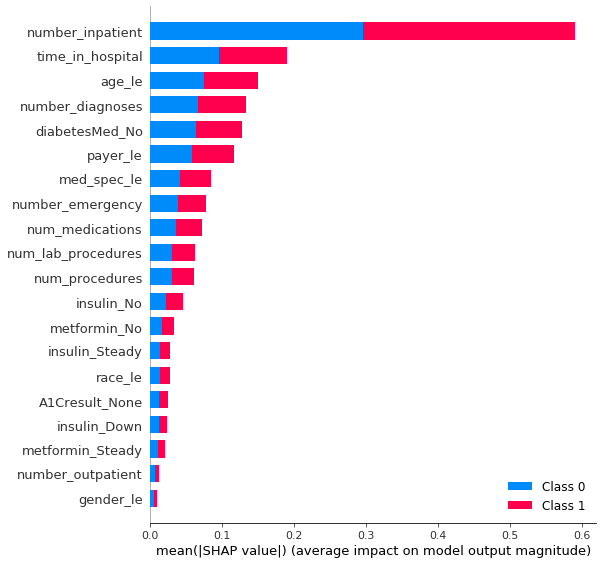

In [69]:
shap.summary_plot(rh_shaps_train, x_train, plot_type = "bar")

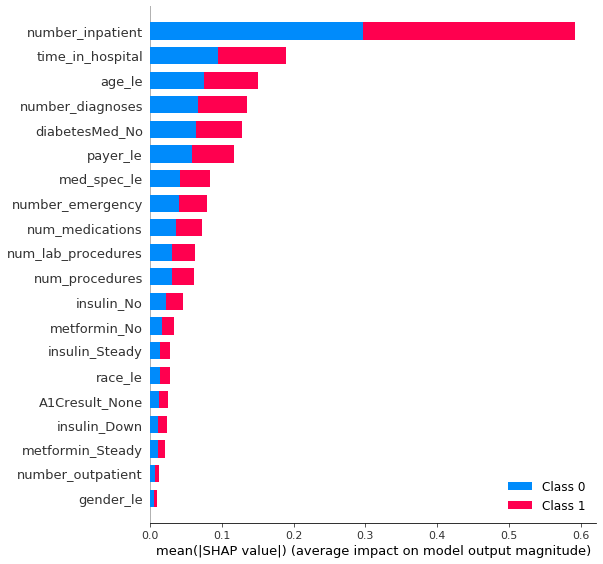

In [70]:
shap.summary_plot(rh_shaps_test, x_test)

#### The most important variable is "number_inpatient" as can be seen in the above graph it has the highest impact on the model

In [72]:
xgb_var_interactions = shap.TreeExplainer(gbm_rh).shap_interaction_values(x_test)

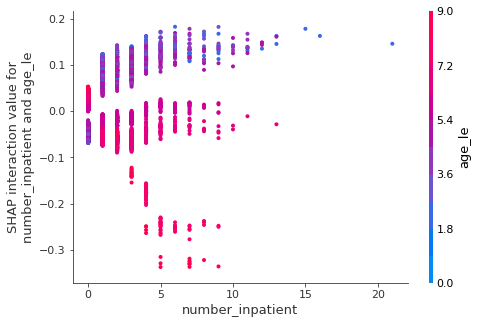

In [73]:
shap.dependence_plot(("number_inpatient", "age_le"),
                     xgb_var_interactions, x_test,
                     display_features = x_test)

#### The above plot shows that with lower age more inpatient time. Like the blue dots (lower age) is at the far right, but older people have hospitalized more, as there are more red dots.

## Part III Gridsearch

### Choose either hyperband or hyperopt to perform gridsearch on one of your models. What are the best parameters? Train and test this model with the best parameters. How does your model perform on train and test in terms of AUC? Is it overfit, underfit, or fit well? If it's overfit or underfit, what would you do to make your model perform better?
6 points:

- 1 point for successful gridsearch with hyperopt or hyperband
- 1 point for identifying best parameters
- 1 point for successfully training and testing a new model with these parameters
- 1 point for evaluating AUC on train and test with new model
- 1 point for accurately identifying fit
- 1 point for explaining how you would change your model is underfit or overfit

#### Previously I used Hyperopt to tune the models, now it's time to look into Hyperband

In [77]:
import hyperband
from hyperband import HyperbandSearchCV

In [78]:
# Set paramters for the models
band_params = {'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 0.9,
 'importance_type': 'split',
 'learning_rate': 0.01,
 'max_depth': 20,
 'min_child_samples': 25,
 'min_split_gain': 0,
 'n_estimators': 4000,
 'n_jobs': -1,
 'num_leaves': 200,
 'objective': 'binary',
 'random_state': None,
 'reg_alpha': 0,
 'reg_lambda': 0,
 'silent': True,
 #'subsample': 0.8,
 'subsample_for_bin': 200000,
 'subsample_freq': 1,
 'metric': 'auc',
 'max_bin': 100,
 'verbose': -1,
 'scale_pos_weight': 1}

In [79]:
param_dict =  {
    'learning_rate': [.001,0.01,0.1],
    'max_depth': [5,15, 20, 30, 50],
    'num_leaves': [50,150,200,250],
    'min_child_samples': [35,40,60,80],
    'subsample': [0.7,0.8,0.9],
    'min_child_weight' : [0, 0.5, 2, 3, 5]
}

#### Hyperband on LightGBM

In [80]:
search = HyperbandSearchCV(lgb.LGBMClassifier(** band_params),param_dict,cv=3,
                           resource_param='n_estimators',verbose=100,
                           max_iter=200,min_iter=50,
                           scoring='roc_auc')

In [81]:
search.fit(x_train,y_train)

Starting bracket 1 (out of 2) of hyperband
Starting successive halving iteration 1 out of 2. Fitting 3 configurations, with resource_param n_estimators set to 66, and keeping the best 1 configurations.
Fitting 3 folds for each of 3 candidates, totalling 9 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] subsample=0.9, num_leaves=250, min_child_weight=0.5, min_child_samples=60, max_depth=50, learning_rate=0.1, n_estimators=66 
[CV]  subsample=0.9, num_leaves=250, min_child_weight=0.5, min_child_samples=60, max_depth=50, learning_rate=0.1, n_estimators=66, score=0.609, total=   0.9s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[CV] subsample=0.9, num_leaves=250, min_child_weight=0.5, min_child_samples=60, max_depth=50, learning_rate=0.1, n_estimators=66 
[CV]  subsample=0.9, num_leaves=250, min_child_weight=0.5, min_child_samples=60, max_depth=50, learning_rate=0.1, n_estimators=66, score=0.616, total=   1.0s
[P

The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.


[CV]  subsample=0.7, num_leaves=250, min_child_weight=5, min_child_samples=35, max_depth=50, learning_rate=0.01, n_estimators=200, score=0.631, total=   2.3s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s
[CV] subsample=0.7, num_leaves=250, min_child_weight=5, min_child_samples=35, max_depth=50, learning_rate=0.01, n_estimators=200 
[CV]  subsample=0.7, num_leaves=250, min_child_weight=5, min_child_samples=35, max_depth=50, learning_rate=0.01, n_estimators=200, score=0.637, total=   2.4s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.6s remaining:    0.0s
[CV] subsample=0.7, num_leaves=250, min_child_weight=5, min_child_samples=35, max_depth=50, learning_rate=0.01, n_estimators=200 
[CV]  subsample=0.7, num_leaves=250, min_child_weight=5, min_child_samples=35, max_depth=50, learning_rate=0.01, n_estimators=200, score=0.634, total=   2.2s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done

The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.


[CV]  subsample=0.9, num_leaves=150, min_child_weight=0, min_child_samples=60, max_depth=5, learning_rate=0.001, n_estimators=200, score=0.638, total=   0.9s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[CV] subsample=0.9, num_leaves=150, min_child_weight=0, min_child_samples=60, max_depth=5, learning_rate=0.001, n_estimators=200 
[CV]  subsample=0.9, num_leaves=150, min_child_weight=0, min_child_samples=60, max_depth=5, learning_rate=0.001, n_estimators=200, score=0.638, total=   1.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s
[CV] subsample=0.9, num_leaves=150, min_child_weight=0, min_child_samples=60, max_depth=5, learning_rate=0.001, n_estimators=200 
[CV]  subsample=0.9, num_leaves=150, min_child_weight=0, min_child_samples=60, max_depth=5, learning_rate=0.001, n_estimators=200, score=0.636, total=   1.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.8s remaining:    0.0s
[CV] subsample=0.8, num_le

The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.


HyperbandSearchCV(cv=3, error_score='raise',
                  estimator=LGBMClassifier(boosting_type='gbdt',
                                           class_weight=None,
                                           colsample_bytree=0.9,
                                           importance_type='split',
                                           learning_rate=0.01, max_bin=100,
                                           max_depth=20, metric='auc',
                                           min_child_samples=25,
                                           min_child_weight=0.001,
                                           min_split_gain=0, n_estimators=4000,
                                           n_jobs=-1, num_leaves=200,
                                           objective='binary',
                                           random_state=None,...
                  param_distributions={'learning_rate': [0.001, 0.01, 0.1],
                                       'max_depth': [5, 15, 20

#### Best Parameters

In [82]:
search.best_params_

{'subsample': 0.9,
 'num_leaves': 150,
 'min_child_weight': 0,
 'min_child_samples': 60,
 'max_depth': 5,
 'learning_rate': 0.001,
 'n_estimators': 200}

In [83]:
search.cv_results_

{'mean_fit_time': array([0.83641831, 0.47473025, 0.89095068, 2.13927929, 0.86302495,
        2.01925588]),
 'std_fit_time': array([0.02071105, 0.04141857, 0.05265666, 0.06529301, 0.0445302 ,
        0.1458597 ]),
 'mean_score_time': array([0.08710074, 0.08543817, 0.09142296, 0.15325673, 0.09940132,
        0.18551397]),
 'std_score_time': array([0.00094021, 0.01099609, 0.01024796, 0.00729867, 0.01788438,
        0.01270652]),
 'param_subsample': masked_array(data=[0.9, 0.7, 0.7, 0.7, 0.9, 0.8],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_num_leaves': masked_array(data=[250, 50, 250, 250, 150, 150],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_child_weight': masked_array(data=[0.5, 0.5, 5, 5, 0, 5],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_chil

In [84]:
##Predicting the data
search.score(x_train, y_train)

0.650157538155123

In [85]:
search.score(x_test, y_test)

0.6363836045829829

#### The model is neither under nor overfit.
#### If the the data set happens to underfit then we could increase the tree depth, in case of overfit we would need to do Cross Validation.